# Classification of Images of Geometric Shapes

## 1. Import necessary packages

In [18]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import cv2

from keras.utils import to_categorical, load_img
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## 2. Load in the data

(100, 100)


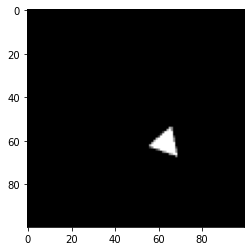

In [19]:
data_direc = 'geometric shapes dataset'
classes = []
#Obtain the name of the class directories we will work with
for i in os.listdir(data_direc):
    classes.append(i)

#read in images from separate class directories
data = []
class_labels = []
scale_factor = 0.5

label = 0
for i in classes:
    path = data_direc+'/'+str(i)
    images = os.listdir(path)
    for img in images:
        image = cv2.imread(path+'/'+img,0) #read in the image in greyscale to reduce computation time
        size = (int(image.shape[1] * scale_factor), int(image.shape[0] * scale_factor)) 
        image = cv2.resize(image, size, interpolation=cv2.INTER_AREA) #resize using aspect ratio
        image = np.array(image)
        data.append(image) #add image to dataset
        class_labels.append(label) #add associated integer label to class_labels list
    label = label + 1

plt.imshow(data[29999], cmap='gray')
print(data[29999].shape)

## 3. Split data into training and testing

In [56]:
#Convert images and labels to numpy arrays
training_images = np.array(data)
training_labels = np.array(class_labels)

#Convert labels into One-Hot Encoded labels
training_labels = to_categorical(training_labels, num_classes = 3)

#Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(training_images, training_labels,   
                                                    test_size = 0.2, random_state = 42, shuffle=True)

#Regularize images to ease computation
x_train = x_train/255
x_test = x_test/255

#Reshape, adding a channels dimension
x_train = x_train.reshape(-1,100,100,1)
x_test = x_test.reshape(-1,100,100,1)

#Verify dimensions of training and testing sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 100, 100, 1)
(6000, 100, 100, 1)
(24000, 3)
(6000, 3)


## 4. Convolutional Neural Network Setup

In [66]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3, padding = "same", activation = "relu", input_shape = (100,100,1)))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = 2))

#fully connected neural network
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation = "softmax"))

## 5. Compile and fit the model

In [67]:
#compile model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#fit the model on the training and testing sets
history = model.fit(x_train, y_train, batch_size = 128, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
188/188 [==============================] - 37s 192ms/step - loss: 1.0079 - accuracy: 0.4692 - val_loss: 0.9097 - val_accuracy: 0.5593
Epoch 2/20
188/188 [==============================] - 31s 166ms/step - loss: 0.8235 - accuracy: 0.6050 - val_loss: 0.7053 - val_accuracy: 0.6463
Epoch 3/20
188/188 [==============================] - 25s 131ms/step - loss: 0.6323 - accuracy: 0.7141 - val_loss: 0.5351 - val_accuracy: 0.7618
Epoch 4/20
188/188 [==============================] - 27s 141ms/step - loss: 0.4890 - accuracy: 0.7889 - val_loss: 0.4399 - val_accuracy: 0.8150
Epoch 5/20
188/188 [==============================] - 29s 152ms/step - loss: 0.4050 - accuracy: 0.8316 - val_loss: 0.3326 - val_accuracy: 0.8672
Epoch 6/20
188/188 [==============================] - 37s 194ms/step - loss: 0.3408 - accuracy: 0.8587 - val_loss: 0.2949 - val_accuracy: 0.8962
Epoch 7/20
188/188 [==============================] - 31s 164ms/step - loss: 0.2910 - accuracy: 0.8831 - val_loss: 0.2578 - val_ac

## 6. Evaluate training loss vs validation loss

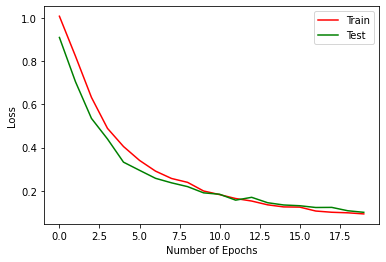

In [72]:
#check the loss
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'g')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.show()

## 7. Evaluate training accuracy vs validation accuracy

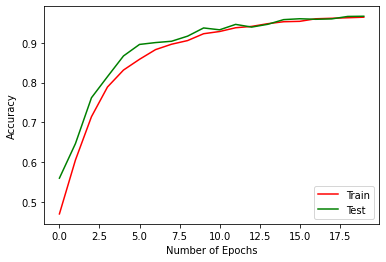

In [73]:
#check the accuracy
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'g')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()

## 8. Display Accuracy of Model

In [71]:
model_accuracy = model.evaluate(x_test,y_test, verbose = 0)
print("accuracy of model: ", model_accuracy[1])

accuracy of model:  0.9671666622161865
